# Sprawozdanie 

In [1]:
import json
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import numpy as np


# shared_mem.json

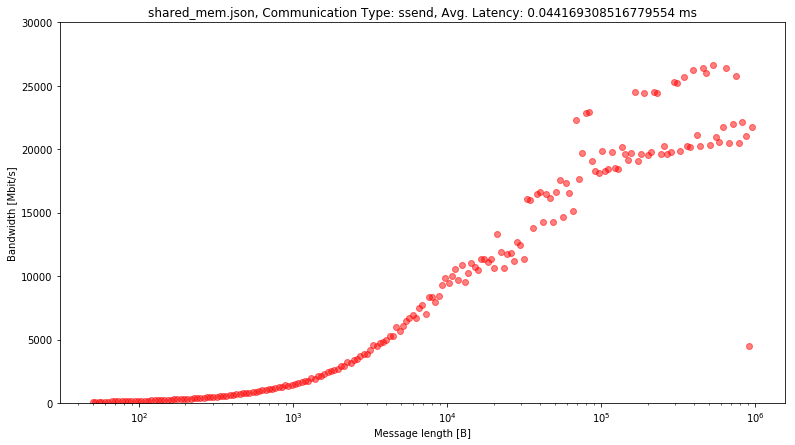

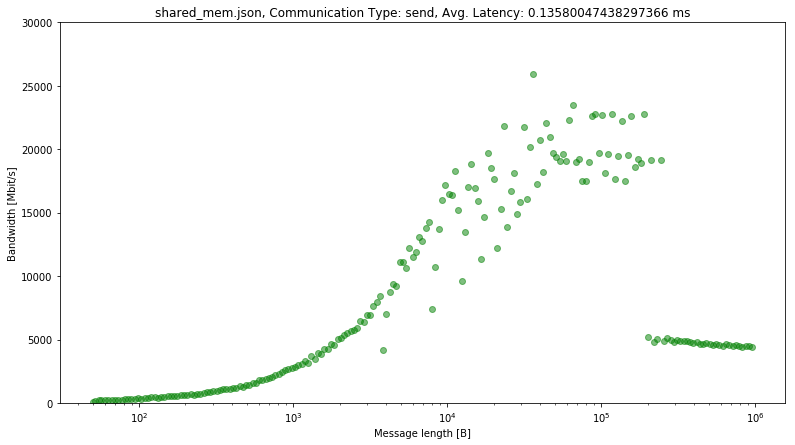

# network.json

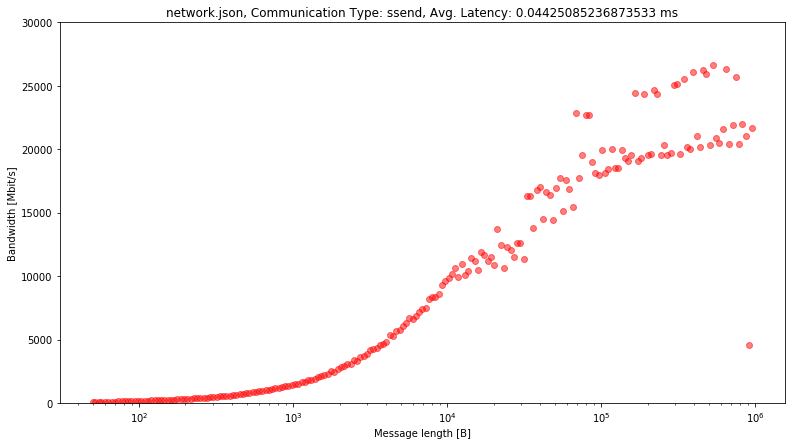

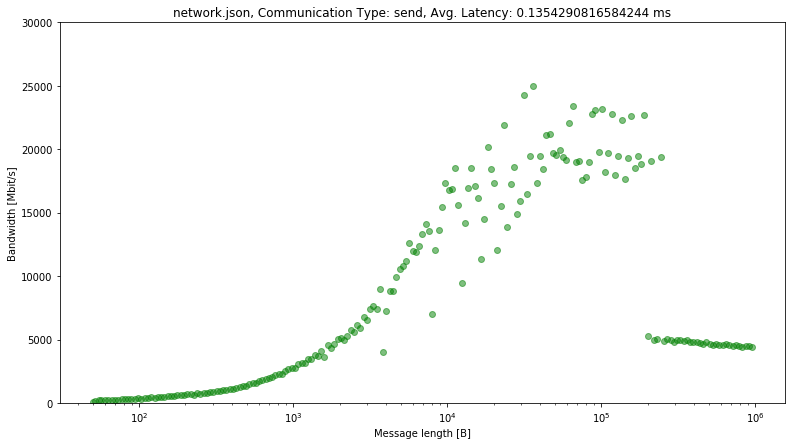

# same_machine.json

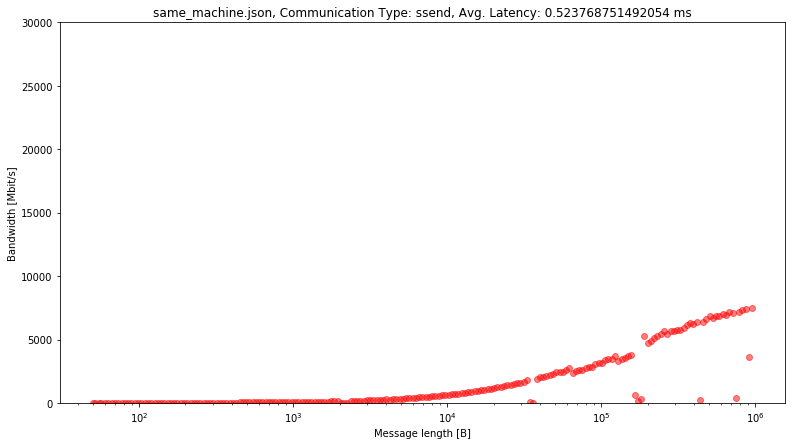

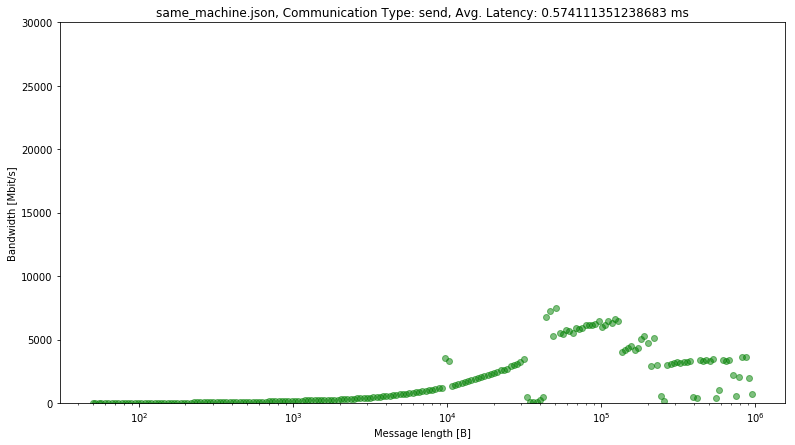

# diff_machines.json

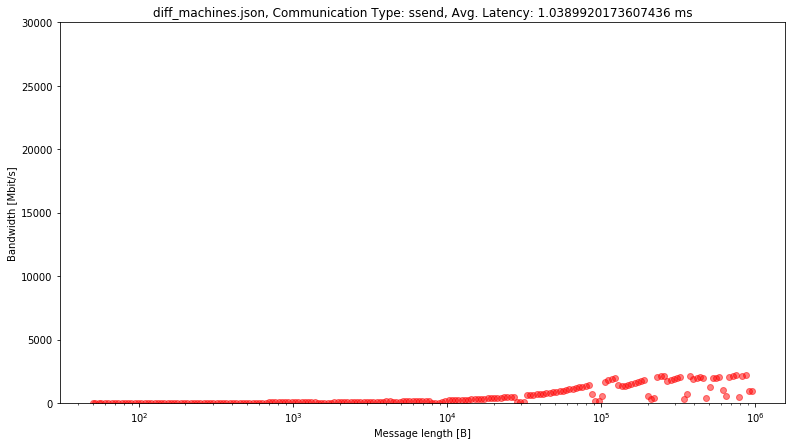

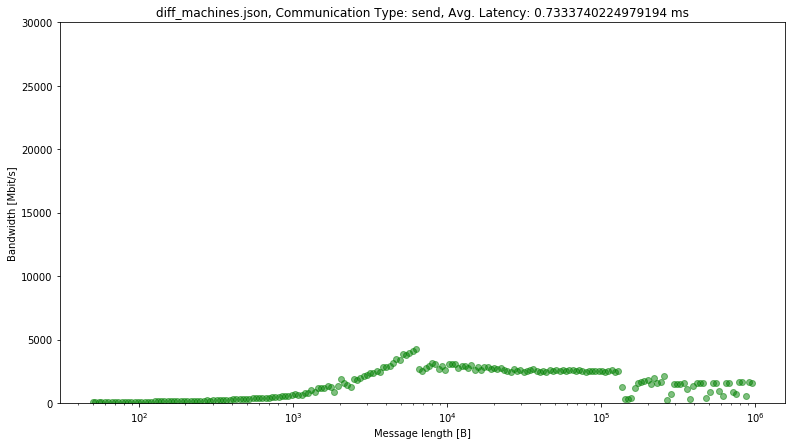

In [3]:
for file_name in ['shared_mem.json', 'network.json', 'same_machine.json', 'diff_machines.json']:
    with open(file_name, "r") as f:
        j = json.load(f)

        name = file_name
        display(Markdown("# {}".format(name)))

        for mode, values in j.items():
            plt.figure(figsize=(13, 7))
            color = "green" if mode == "send" else "red"
            plt.scatter(values["payload_size"], values["bandwidth"], alpha=0.5, c=color)

            plot_title = "{}, Communication Type: {}, Avg. Latency: {} ms".format(name, mode, np.mean(values["latency"]))
            plt.title(plot_title)
            plt.gca().set_xscale("log")
            plt.gca().set_ylim([0, 30000])

            plt.xlabel("Message length [B]")
            plt.ylabel("Bandwidth [Mbit/s]")

            plt.show()
        print("\n")


# Wnioski

## Send a Ssend
Z powyższych wykresów widać, że metoda synchroniczna ssend wykazuje większe opóźnienia oraz mniejszą przepustowość w każdym z testowanych scenariuszy. Wynika to z charakterystyki działania metody ssend, która zawsze czeka, aż odbierający odbierze wiadomość metodą receive. Natomiast metoda send czeka do momentu aż zostanie zwolniony bufor wysyłania, co może stać się zanim odbiorca odbierze wiadomość. Można powiedzieć, że metoda ssend ma działanie takie jak funkcja barrier. Upewnia się, że obydwa programy znajdą się w tym samym miejscu wykonania w konkretnym momencie.
## Uruchamianie jednego node'a (wariant shared mem i po sieci)
Wyniki nie odbiegają od siebie w znacznym stopniu. Widać, że komunikacja po sieci jest trochę wolniejsza od komunikacji po pamięci współdzielonej.
## Uruchamianie dwóch node'ów(ta sama maszyna i dwie różne maszyny)
Uruchamianie na tej samej maszynie wygenerowało dużo większe opóźnienia i mniejszy bandwidth od poprzedniego eksperymentu. Uruchamianie na różnych maszynach było wolniejsze od uruchamiania na tej samej maszynie. Natomiast wykresy dla programów uruchamianych na dwóch node'ach pokazują małą różnicę w przepustowości przy wzroście rozmiaru wiadomości w porównaniu do programów wykonywanych na jednym nodzie.